In [5]:
#Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import data and describe it
df = pd.read_csv("./demographics.csv")
df.describe()

,customer_id,age,annual_income,employment_length,num_dependents
count,89999.000000,89999.000000,89999.000000,89999.000000,89999.000000
mean,54999.000000,38.715041,47586.732075,5.514893,1.199391
std,25980.617776,10.805176,26691.159740,3.227066,1.136630
min,10000.000000,18.000000,20000.000000,0.000000,0.000000
25%,32499.500000,31.000000,28100.000000,3.000000,0.000000
50%,54999.000000,38.000000,41100.000000,5.300000,1.000000
75%,77498.500000,46.000000,59300.000000,7.600000,2.000000
max,99998.000000,74.000000,487200.000000,23.900000,5.000000


In [ ]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        89999 non-null  int64  
 1   age                89999 non-null  int64  
 2   annual_income      89999 non-null  int64  
 3   employment_length  89999 non-null  float64
 4   employment_type    89999 non-null  object 
 5   education          89999 non-null  object 
 6   marital_status     89999 non-null  object 
 7   num_dependents     89999 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 5.5+ MB


In [29]:
#rename column - ustun nomini almashtirish
df.rename(columns={"cust_id":"customer_id"},inplace=True)

In [ ]:
#find missing values - yo'qolgan malumotlarni qidirish
placeholders = ['NULL', 'NA', 'N/A', 'nan', r'\N']
print("\nCheck Placeholders:\n",(df.isin(placeholders)).sum())
print("\nMissing Values:\n", df.isnull().sum())


Check Placeholders:
 customer_id          0
age                  0
annual_income        0
employment_length    0
employment_type      0
education            0
marital_status       0
num_dependents       0
dtype: int64

Missing Values:
 customer_id             0
age                     0
annual_income           0
employment_length    2253
employment_type         0
education               0
marital_status          0
num_dependents          0
dtype: int64


In [ ]:
# Fix income type 
df["annual_income"] = (
    df["annual_income"]
    .astype(str)                       # hammasini stringga aylantirish
    .str.replace("$", "", regex=False) # $ olib tashlash
    .str.replace(",", "", regex=False) # vergul olib tashlash
    .str.strip()                       # bo'shliqlarni olib tashlash
)


df["annual_income"] = pd.to_numeric(df["annual_income"], errors="coerce").fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        89999 non-null  int64  
 1   age                89999 non-null  int64  
 2   annual_income      89999 non-null  int64  
 3   employment_length  87746 non-null  float64
 4   employment_type    89999 non-null  object 
 5   education          89999 non-null  object 
 6   marital_status     89999 non-null  object 
 7   num_dependents     89999 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 5.5+ MB


In [ ]:
#Fill missing value with mean
df['employment_length'] = df['employment_length'].fillna(df['employment_length'].mean())

In [ ]:
#check unique class
print(df['employment_type'].unique())

['Full-time' 'FULL_TIME' 'Full Time' 'Fulltime' 'Part Time'
 'Self Employed' 'FT' 'Self Emp' 'Contractor' 'Self-employed'
 'SELF_EMPLOYED' 'Contract' 'PART_TIME' 'CONTRACT' 'PT' 'Part-time']


In [ ]:
#Fix classification
mapping = {
    'Full-time': 'Full Time',
    'FULL_TIME': 'Full Time',
    'Full Time': 'Full Time',
    'Fulltime': 'Full Time',
    'Part Time': 'Part Time',
    'Self Employed': 'Self Employed',
    'FT': 'Full Time',
    'Self Emp': 'Self Employed',
    'Contractor': 'Contractor',
    'Self-employed': 'Self Employed',
    'SELF_EMPLOYED': 'Self Employed',
    'Contract': 'Contractor',
    'PART_TIME': 'Part Time',
    'CONTRACT': 'Contractor',
    'PT': 'Part Time',
    'Part-time': 'Part Time'

}

df['employment_type'] = df['employment_type'].map(mapping)



In [43]:
df.to_csv("demographics_cleaned.csv", index=False)

In [8]:
newdf = pd.read_csv("demographics_cleaned.csv")

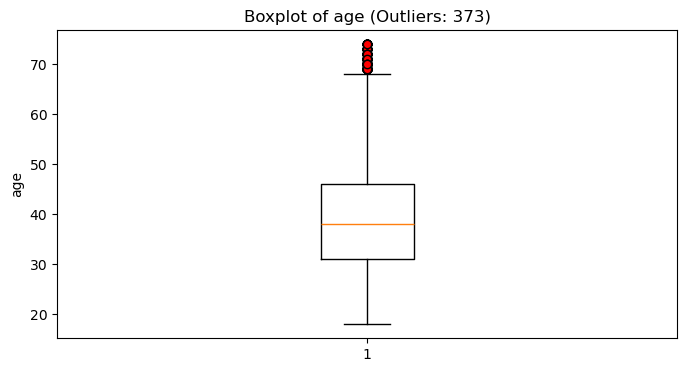

Column: age, Number of outliers: 373


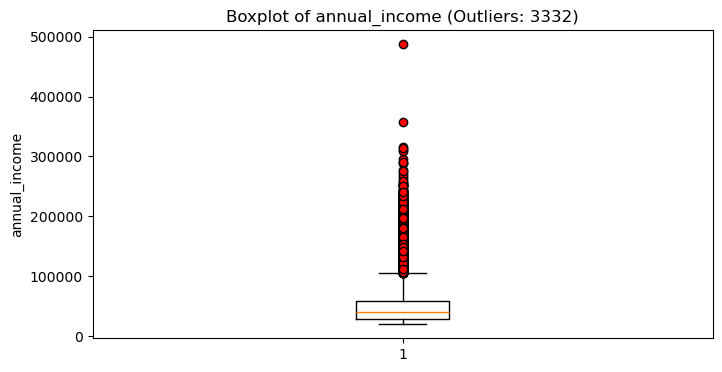

Column: annual_income, Number of outliers: 3332


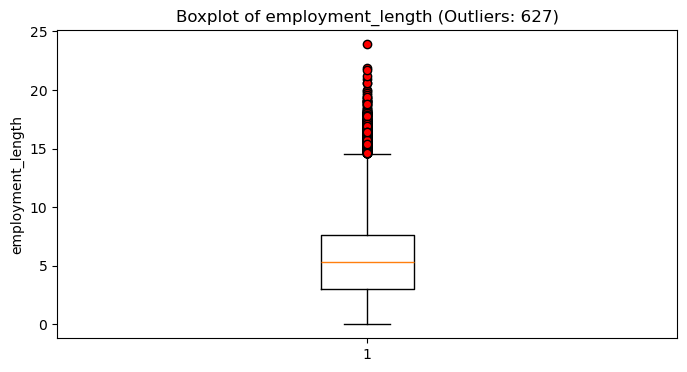

Column: employment_length, Number of outliers: 627


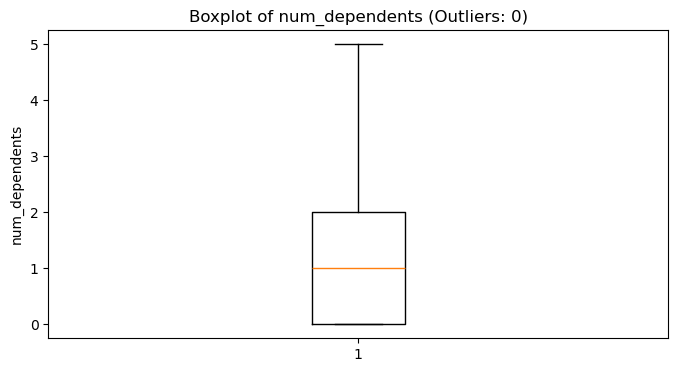

Column: num_dependents, Number of outliers: 0


In [9]:
skip_cols = [col for col in newdf.columns if col.endswith('_id')]
numeric_cols = newdf.select_dtypes(include='number').columns.difference(skip_cols)

for col in numeric_cols:
        Q1 = newdf[col].quantile(0.25)
        Q3 = newdf[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = newdf[(newdf[col] < Q1 - 1.5*IQR) | (newdf[col] > Q3 + 1.5*IQR)][col]
        
        plt.figure(figsize=(8,4))
        plt.boxplot(newdf[col], flierprops=dict(marker='o', markerfacecolor='red', markersize=6))
        plt.title(f'Boxplot of {col} (Outliers: {len(outliers)})')
        plt.ylabel(col)
        plt.show()
        print(f'Column: {col}, Number of outliers: {len(outliers)}')